In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df=pd.read_csv('synthese-fra.csv')
df.head()

,date,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation
0,2020-03-02,191.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,212.0,4,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
2,2020-03-04,285.0,4,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
3,2020-03-05,423.0,7,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
4,2020-03-06,613.0,9,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN


In [4]:
#### Let check is there are data missing values
df.isnull().sum()

date                                0
total_cas_confirmes               417
total_deces_hopital                 0
total_deces_ehpad                  32
total_cas_confirmes_ehpad         457
total_cas_possibles_ehpad         755
patients_reanimation                6
patients_hospitalises              14
total_patients_gueris              14
nouveaux_patients_hospitalises     17
nouveaux_patients_reanimation      17
dtype: int64

In [6]:
df.shape

(770, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            770 non-null    object 
 1   total_cas_confirmes             353 non-null    float64
 2   total_deces_hopital             770 non-null    int64  
 3   total_deces_ehpad               738 non-null    float64
 4   total_cas_confirmes_ehpad       313 non-null    float64
 5   total_cas_possibles_ehpad       15 non-null     float64
 6   patients_reanimation            764 non-null    float64
 7   patients_hospitalises           756 non-null    float64
 8   total_patients_gueris           756 non-null    float64
 9   nouveaux_patients_hospitalises  753 non-null    float64
 10  nouveaux_patients_reanimation   753 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 66.3+ KB


In [9]:
[features for features in df.columns if df[features].isnull().sum()>0]

['total_cas_confirmes',
 'total_deces_ehpad',
 'total_cas_confirmes_ehpad',
 'total_cas_possibles_ehpad',
 'patients_reanimation',
 'patients_hospitalises',
 'total_patients_gueris',
 'nouveaux_patients_hospitalises',
 'nouveaux_patients_reanimation']

<AxesSubplot:>

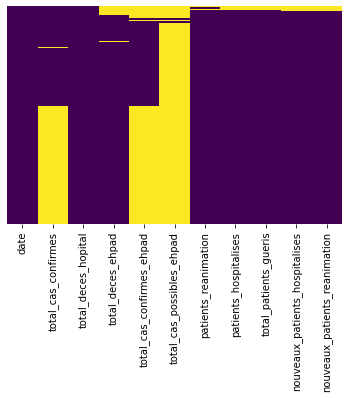

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### We noticed that there are data missing value and let fix them.

#### Let be forcused on replacing value

In [12]:
## Focus on replacing missing values
df['total_cas_confirmes'].unique()

array([1.910000e+02, 2.120000e+02, 2.850000e+02, 4.230000e+02,
       6.130000e+02, 9.490000e+02, 1.126000e+03, 1.412000e+03,
       1.784000e+03, 2.281000e+03, 2.876000e+03, 3.661000e+03,
       4.500000e+03, 5.423000e+03, 6.633000e+03, 7.730000e+03,
       9.134000e+03, 1.099500e+04, 1.261200e+04, 1.445900e+04,
       1.668900e+04, 1.985600e+04, 2.230200e+04, 2.523300e+04,
       2.915500e+04, 3.296400e+04, 3.757500e+04, 4.017400e+04,
       4.455000e+04, 5.212800e+04, 5.698900e+04, 5.910500e+04,
       6.433800e+04, 6.860500e+04, 7.047800e+04, 7.439000e+04,
       7.816700e+04, 8.204800e+04, 8.633400e+04, 9.067600e+04,
       9.379000e+04, 9.540300e+04, 9.807600e+04, 1.035730e+05,
       1.062060e+05, 1.088470e+05, 1.092520e+05, 1.118210e+05,
       1.126060e+05, 1.146570e+05, 1.173240e+05, 1.191510e+05,
       1.208040e+05, 1.225770e+05, 1.241140e+05, 1.245750e+05,
       1.283390e+05, 1.298590e+05, 1.284420e+05, 1.295810e+05,
       1.301850e+05, 1.309790e+05, 1.312870e+05, 1.3186

In [13]:
df['total_cas_confirmes'].mode()[0]

161348.0

In [14]:
## Replace the missing values with mode
df['total_cas_confirmes']=df['total_cas_confirmes'].fillna(df['total_cas_confirmes'].mode()[0])

In [15]:
df['total_cas_confirmes'].isnull().sum()

0

In [16]:
## Focus on replacing missing values
df['total_deces_ehpad'].unique()

array([   nan,   371.,   884.,  1416.,  2028.,  2189.,  2417.,  3237.,
        4166.,  4599.,  4889.,  5140.,  5379.,  5600.,  6524.,  6860.,
        7203.,  7481.,  7649.,  7752.,  7896.,  8104.,  8309.,  8393.,
        8564.,  8654.,  8796.,  8850.,  9034.,  9132.,  9225.,  9273.,
        9312.,  9375.,  9471.,  9572.,  9601.,  9733.,  9737.,  9738.,
        9823.,  9988.,  9973., 10201., 10187., 10213., 10642., 10650.,
       10308., 10320., 10345., 10335., 10336., 10327., 10350., 10384.,
       10457., 10488., 10497., 10476., 10541., 10516., 10515., 10506.,
       10505., 10511., 10507., 10514., 10475., 10528., 10560., 10571.,
       10666., 10692., 10781., 10785., 10832., 10856., 10912., 11012.,
       11126., 11361., 11651., 12079., 12509., 13263., 13739., 14530.,
       15287., 15838., 16402., 16814., 17159., 17613., 17936., 18419.,
       18774., 19195., 19780., 20302., 20616., 21003., 21359., 21646.,
       21976., 22238., 22703., 23025., 23383., 23671., 23999., 24234.,
      

In [17]:
df['total_deces_ehpad'].mode()[0]

26473.0

In [18]:
## Replace the missing values with mode
df['total_deces_ehpad']=df['total_deces_ehpad'].fillna(df['total_deces_ehpad'].mode()[0])

In [19]:
df['total_deces_ehpad'].isnull().sum()

0

In [21]:
## Focus on replacing missing values on total_cas_confirmes_ehpad 
df['total_cas_confirmes_ehpad'].unique()

array([    nan,  11958.,  12481.,  13050.,  14393.,  18967.,  20272.,
        22163.,  23048.,  23668.,  25513.,  26840.,  27880.,  29126.,
        29643.,  30227.,  30817.,  31795.,  32355.,  32791.,  33271.,
        33361.,  33791.,  34108.,  34507.,  34653.,  34890.,  35046.,
        35236.,  35195.,  35437.,  35604.,  35820.,  36126.,  36175.,
        36461.,  36599.,  36530.,  36751.,  36853.,  37235.,  37273.,
        37405.,  37599.,  37901.,  37995.,  38107.,  39256.,  39464.,
        39554.,  39638.,  39645.,  39744.,  39930.,  40043.,  40083.,
        40300.,  40876.,  41389.,  42047.,  42699.,  43555.,  44471.,
        45090.,  45701.,  46520.,  47549.,  48845.,  53385.,  57261.,
        62297.,  68349.,  73958.,  80369.,  87932.,  94240., 101482.,
       107460., 112080., 116240., 119716., 123298., 126828., 129501.,
       133545., 137358., 140766., 145914., 149671., 152693., 156006.,
       159791., 162430., 166457., 169291., 173312., 175811., 179604.,
       181965., 1841

In [22]:
df['total_cas_confirmes_ehpad'].mode()[0]

39256.0

In [25]:
## Replace the missing values with mode
df['total_cas_confirmes_ehpad']=df['total_cas_confirmes_ehpad'].fillna(df['total_cas_confirmes_ehpad'].mode()[0])

In [26]:
df['total_cas_confirmes_ehpad'].isnull().sum()

0

In [27]:
## Focus on replacing missing values on total_cas_possibles_ehpad  
df['total_cas_possibles_ehpad'].unique()

array([   nan, 25230., 26222., 26680., 27264., 37213., 38717., 39972.,
       40288., 40726., 37379., 37251., 37374., 37525., 37503., 39076.])

In [28]:
df['total_cas_possibles_ehpad'].mode()[0]

25230.0

In [29]:
## Replace the missing values with mode
df['total_cas_possibles_ehpad']=df['total_cas_possibles_ehpad'].fillna(df['total_cas_possibles_ehpad'].mode()[0])

In [30]:
df['total_cas_confirmes_ehpad'].isnull().sum()

0

In [31]:
## Focus on replacing missing values on patients_reanimation
df['patients_reanimation'].unique()

array([  nan,   15.,   23.,   39.,   45.,   66.,   86.,  105.,  129.,
        300.,  699.,  931., 1122., 1297., 1525., 1746., 2082., 2516.,
       2827., 3375., 3787., 4273., 4632., 5107., 5565., 6017., 6399.,
       6662., 6838., 6978., 7072., 7131., 7148., 7066., 7004., 6883.,
       6845., 6821., 6730., 6457., 6248., 6027., 5833., 5744., 5683.,
       5433., 5218., 5053., 4870., 4725., 4682., 4608., 4387., 4207.,
       4019., 3878., 3827., 3819., 3696., 3430., 3147., 2961., 2868.,
       2812., 2776., 2712., 2542., 2428., 2299., 2203., 2132., 2087.,
       1998., 1894., 1794., 1745., 1701., 1665., 1655., 1609., 1555.,
       1501., 1429., 1361., 1325., 1319., 1302., 1253., 1210., 1163.,
       1094., 1059., 1053., 1024.,  955.,  933.,  903.,  879.,  871.,
        869.,  846.,  820.,  772.,  752.,  727.,  715.,  701.,  682.,
        658.,  651.,  634.,  619.,  602.,  582.,  573.,  560.,  517.,
        521.,  548.,  538.,  529.,  512.,  496.,  470.,  473.,  492.,
        465.,  482.,

In [32]:
df['patients_reanimation'].mode()[0]

380.0

In [33]:
## Replace the missing values with mode
df['patients_reanimation']=df['patients_reanimation'].fillna(df['patients_reanimation'].mode()[0])

In [36]:
df['patients_reanimation'].isnull().sum()

0

In [37]:
## Focus on replacing missing values on patients_hospitalises
df['patients_hospitalises'].unique()

array([   nan,   400.,  2579.,  3626.,  4461.,  5226.,  6172.,  7240.,
        8675., 10176., 11539., 13904., 15732., 17620., 19354., 21008.,
       22757., 24639., 26246., 27432., 28143., 28891., 29722., 30027.,
       30375., 30767., 31267., 31320., 31826., 32113., 32292., 31779.,
       31305., 31190., 30639., 30610., 30584., 30106., 29741., 29219.,
       28658., 28222., 28217., 28055., 27484., 26834., 26283., 25887.,
       25827., 25815., 25548., 24775., 23983., 23208., 22724., 22614.,
       22569., 22284., 21595., 21071., 20463., 19861., 19432., 19361.,
       19015., 18468., 17941., 17583., 17383., 17178., 17185., 16798.,
       16264., 15680., 15208., 14695., 14380., 14322., 14288., 14028.,
       13514., 13101., 12696., 12479., 12461., 12315., 11961., 11678.,
       11465., 11124., 10909., 10881., 10752., 10535., 10267., 10125.,
        9970.,  9837.,  9823.,  9693.,  9491.,  9299.,  9141.,  8886.,
        8688.,  8536.,  8336.,  8148.,  7990.,  7863.,  7850.,  7594.,
      

In [38]:
df['patients_hospitalises'].mode()[0]

4535.0

In [39]:
## Replace the missing values with mode
df['patients_hospitalises']=df['patients_hospitalises'].fillna(df['patients_hospitalises'].mode()[0])

In [40]:
df['patients_hospitalises'].isnull().sum()

0

In [41]:
## Focus on replacing missing values on total_patients_gueris   
df['total_patients_gueris'].unique()

array([        nan, 1.20000e+01, 6.02000e+02, 1.00000e+03, 1.30000e+03,
       1.58700e+03, 1.81100e+03, 2.20000e+03, 2.56700e+03, 3.28100e+03,
       3.90000e+03, 4.94800e+03, 5.69800e+03, 6.62400e+03, 7.13100e+03,
       7.92400e+03, 9.44400e+03, 1.09350e+04, 1.24280e+04, 1.40080e+04,
       1.54380e+04, 1.61830e+04, 1.72500e+04, 1.93370e+04, 2.12540e+04,
       2.32060e+04, 2.49320e+04, 2.63910e+04, 2.71860e+04, 2.77180e+04,
       2.88050e+04, 3.09950e+04, 3.28120e+04, 3.44200e+04, 3.59830e+04,
       3.65780e+04, 3.74090e+04, 3.91810e+04, 4.06570e+04, 4.20880e+04,
       4.34930e+04, 4.45940e+04, 4.49030e+04, 4.55130e+04, 4.68860e+04,
       4.82280e+04, 4.94760e+04, 5.02120e+04, 5.05620e+04, 5.07840e+04,
       5.13710e+04, 5.27360e+04, 5.39720e+04, 5.50270e+04, 5.57820e+04,
       5.60380e+04, 5.62170e+04, 5.67240e+04, 5.77850e+04, 5.86730e+04,
       5.96050e+04, 6.04480e+04, 6.10660e+04, 6.12130e+04, 6.17280e+04,
       6.25630e+04, 6.33540e+04, 6.38580e+04, 6.42090e+04, 6.454

In [42]:
df['total_patients_gueris'].mode()[0]

75649.0

In [43]:
## Replace the missing values with mode
df['total_patients_gueris']=df['total_patients_gueris'].fillna(df['total_patients_gueris'].mode()[0])

In [44]:
df['total_patients_gueris'].isnull().sum()

0

In [45]:
## Focus on replacing missing values on nouveaux_patients_hospitalises   
df['nouveaux_patients_hospitalises'].unique()

array([  nan, 2229., 1256., 1540., 1534., 2053., 2618., 3166., 3097.,
       3059., 3353., 2685., 3108., 4146., 4281., 3845., 3627., 2822.,
       1931., 2754., 3277., 3139., 2990., 3161., 2044., 1688., 1257.,
       1965., 2415., 2084., 2166., 1565.,  890., 1464., 1885., 1619.,
       1410., 1346.,  999.,  481.,  964., 1321., 1070., 1048.,  668.,
        453.,  345.,  689.,  987.,  833.,  728.,  510.,  265.,  253.,
        523.,  670.,  543.,  542.,  438.,  350.,  152.,  375.,  506.,
        432.,  271.,  263.,  233.,  121.,  342.,  318.,  255.,  227.,
         72.,   89.,  229.,  250.,  195.,  213.,  143.,   37.,  145.,
        169.,  130.,  136.,   68.,   33.,  114.,  116.,   90.,   48.,
        142.,  117.,   97.,  124.,   87.,   55.,   44.,  102.,  106.,
         93.,  125.,   47.,   21.,   98.,  127.,   83.,   79.,   57.,
         26.,   61.,  133.,  119.,   36.,  137.,  109.,  132.,  123.,
        126.,   86.,  118.,  172.,   77.,   25.,  139.,  141.,   73.,
         14.,  180.,

In [46]:
df['nouveaux_patients_hospitalises'].mode()[0]

136.0

In [47]:
## Replace the missing values with mode
df['nouveaux_patients_hospitalises']=df['nouveaux_patients_hospitalises'].fillna(df['nouveaux_patients_hospitalises'].mode()[0])

In [48]:
df['nouveaux_patients_hospitalises'].isnull().sum()

0

In [49]:
## Focus on replacing missing values on nouveaux_patients_reanimation 
df['nouveaux_patients_reanimation'].unique()

array([ nan, 438., 242., 298., 309., 448., 571., 607., 612., 608., 695.,
       543., 694., 767., 771., 728., 640., 502., 390., 478., 518., 482.,
       369., 431., 255., 220., 227., 275., 284., 270., 206., 137., 208.,
       190., 183., 178., 155., 124.,  79., 125., 153., 110., 121.,  73.,
        64.,  80.,  84., 111.,  69.,  99.,  89.,  38.,  82.,  92.,  52.,
        46.,  24.,  43.,  28.,  36.,  30.,  45.,  37.,  32.,  29.,  18.,
         9.,  33.,  26.,  23.,  19.,  15.,   4.,  14.,   6.,  12.,  10.,
         7.,   5.,  16.,   8.,  17.,  21.,  13.,   1.,  25.,  22.,  11.,
         3.,  20.,   2.,  34.,  31.,  49.,  54.,  57.,  55.,  83.,  86.,
        71.,  51., 104., 117., 100.,  81., 143., 130., 129.,  47., 165.,
       135., 142., 120., 103.,  91., 152., 168., 114., 150., 171., 226.,
       193., 219., 212., 175., 147., 269., 278., 262., 299., 233., 191.,
       357., 372., 395., 422., 339., 289., 430., 469., 540., 447., 434.,
       394., 323., 484., 473., 351., 386., 471., 32

In [50]:
df['nouveaux_patients_reanimation'].mode()[0]

15.0

In [51]:
## Replace the missing values with mode
df['nouveaux_patients_reanimation'].isnull().sum()']=df['nouveaux_patients_reanimation'].fillna(df['nouveaux_patients_reanimation'].mode()[0])

In [52]:
df['nouveaux_patients_reanimation'].isnull().sum()

0

In [53]:
df.isnull().sum()

date                              0
total_cas_confirmes               0
total_deces_hopital               0
total_deces_ehpad                 0
total_cas_confirmes_ehpad         0
total_cas_possibles_ehpad         0
patients_reanimation              0
patients_hospitalises             0
total_patients_gueris             0
nouveaux_patients_hospitalises    0
nouveaux_patients_reanimation     0
dtype: int64

<AxesSubplot:>

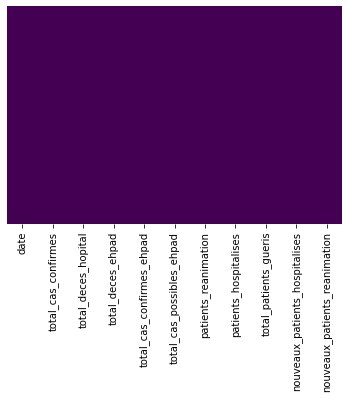

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#####  We just fixed the missing data value
#####  Let carry on with data visualisation 

In [56]:
df.head()

,date,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation
0,2020-03-02,191.0,3,26473.0,39256.0,25230.0,380.0,4535.0,75649.0,136.0,15.0
1,2020-03-03,212.0,4,26473.0,39256.0,25230.0,380.0,4535.0,12.0,136.0,15.0
2,2020-03-04,285.0,4,26473.0,39256.0,25230.0,15.0,4535.0,75649.0,136.0,15.0
3,2020-03-05,423.0,7,26473.0,39256.0,25230.0,23.0,4535.0,75649.0,136.0,15.0
4,2020-03-06,613.0,9,26473.0,39256.0,25230.0,39.0,4535.0,75649.0,136.0,15.0


#### Let do some data visualisation

In [57]:
df = df.set_index('date')

In [58]:


df[['total_cas_confirmes']]



,total_cas_confirmes
date,
2020-03-02,191.0
2020-03-03,212.0
2020-03-04,285.0
2020-03-05,423.0
2020-03-06,613.0
...,...
2022-04-06,161348.0
2022-04-07,161348.0
2022-04-08,161348.0


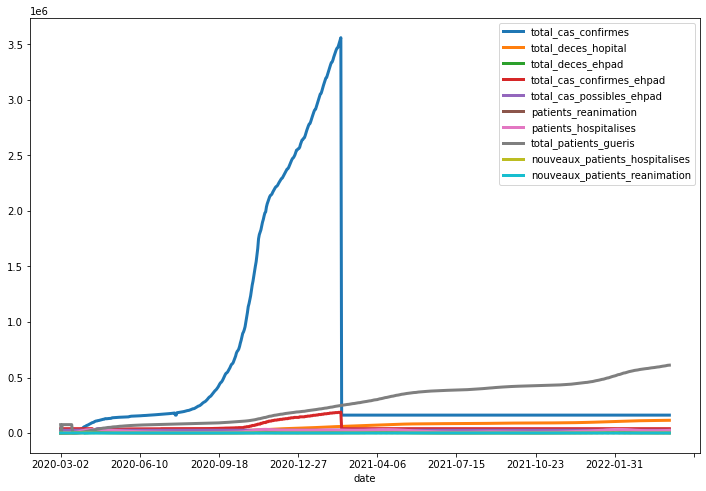

In [62]:
case = df[['total_cas_confirmes','total_deces_hopital','total_deces_ehpad','total_cas_confirmes_ehpad','total_cas_possibles_ehpad','patients_reanimation','patients_hospitalises','total_patients_gueris','nouveaux_patients_hospitalises','nouveaux_patients_reanimation']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

##### Observation: We can noticed that "total cas confirme" has started to speedly decreased on 2021-04-06 
##### however the rate of death is closed to be null value.

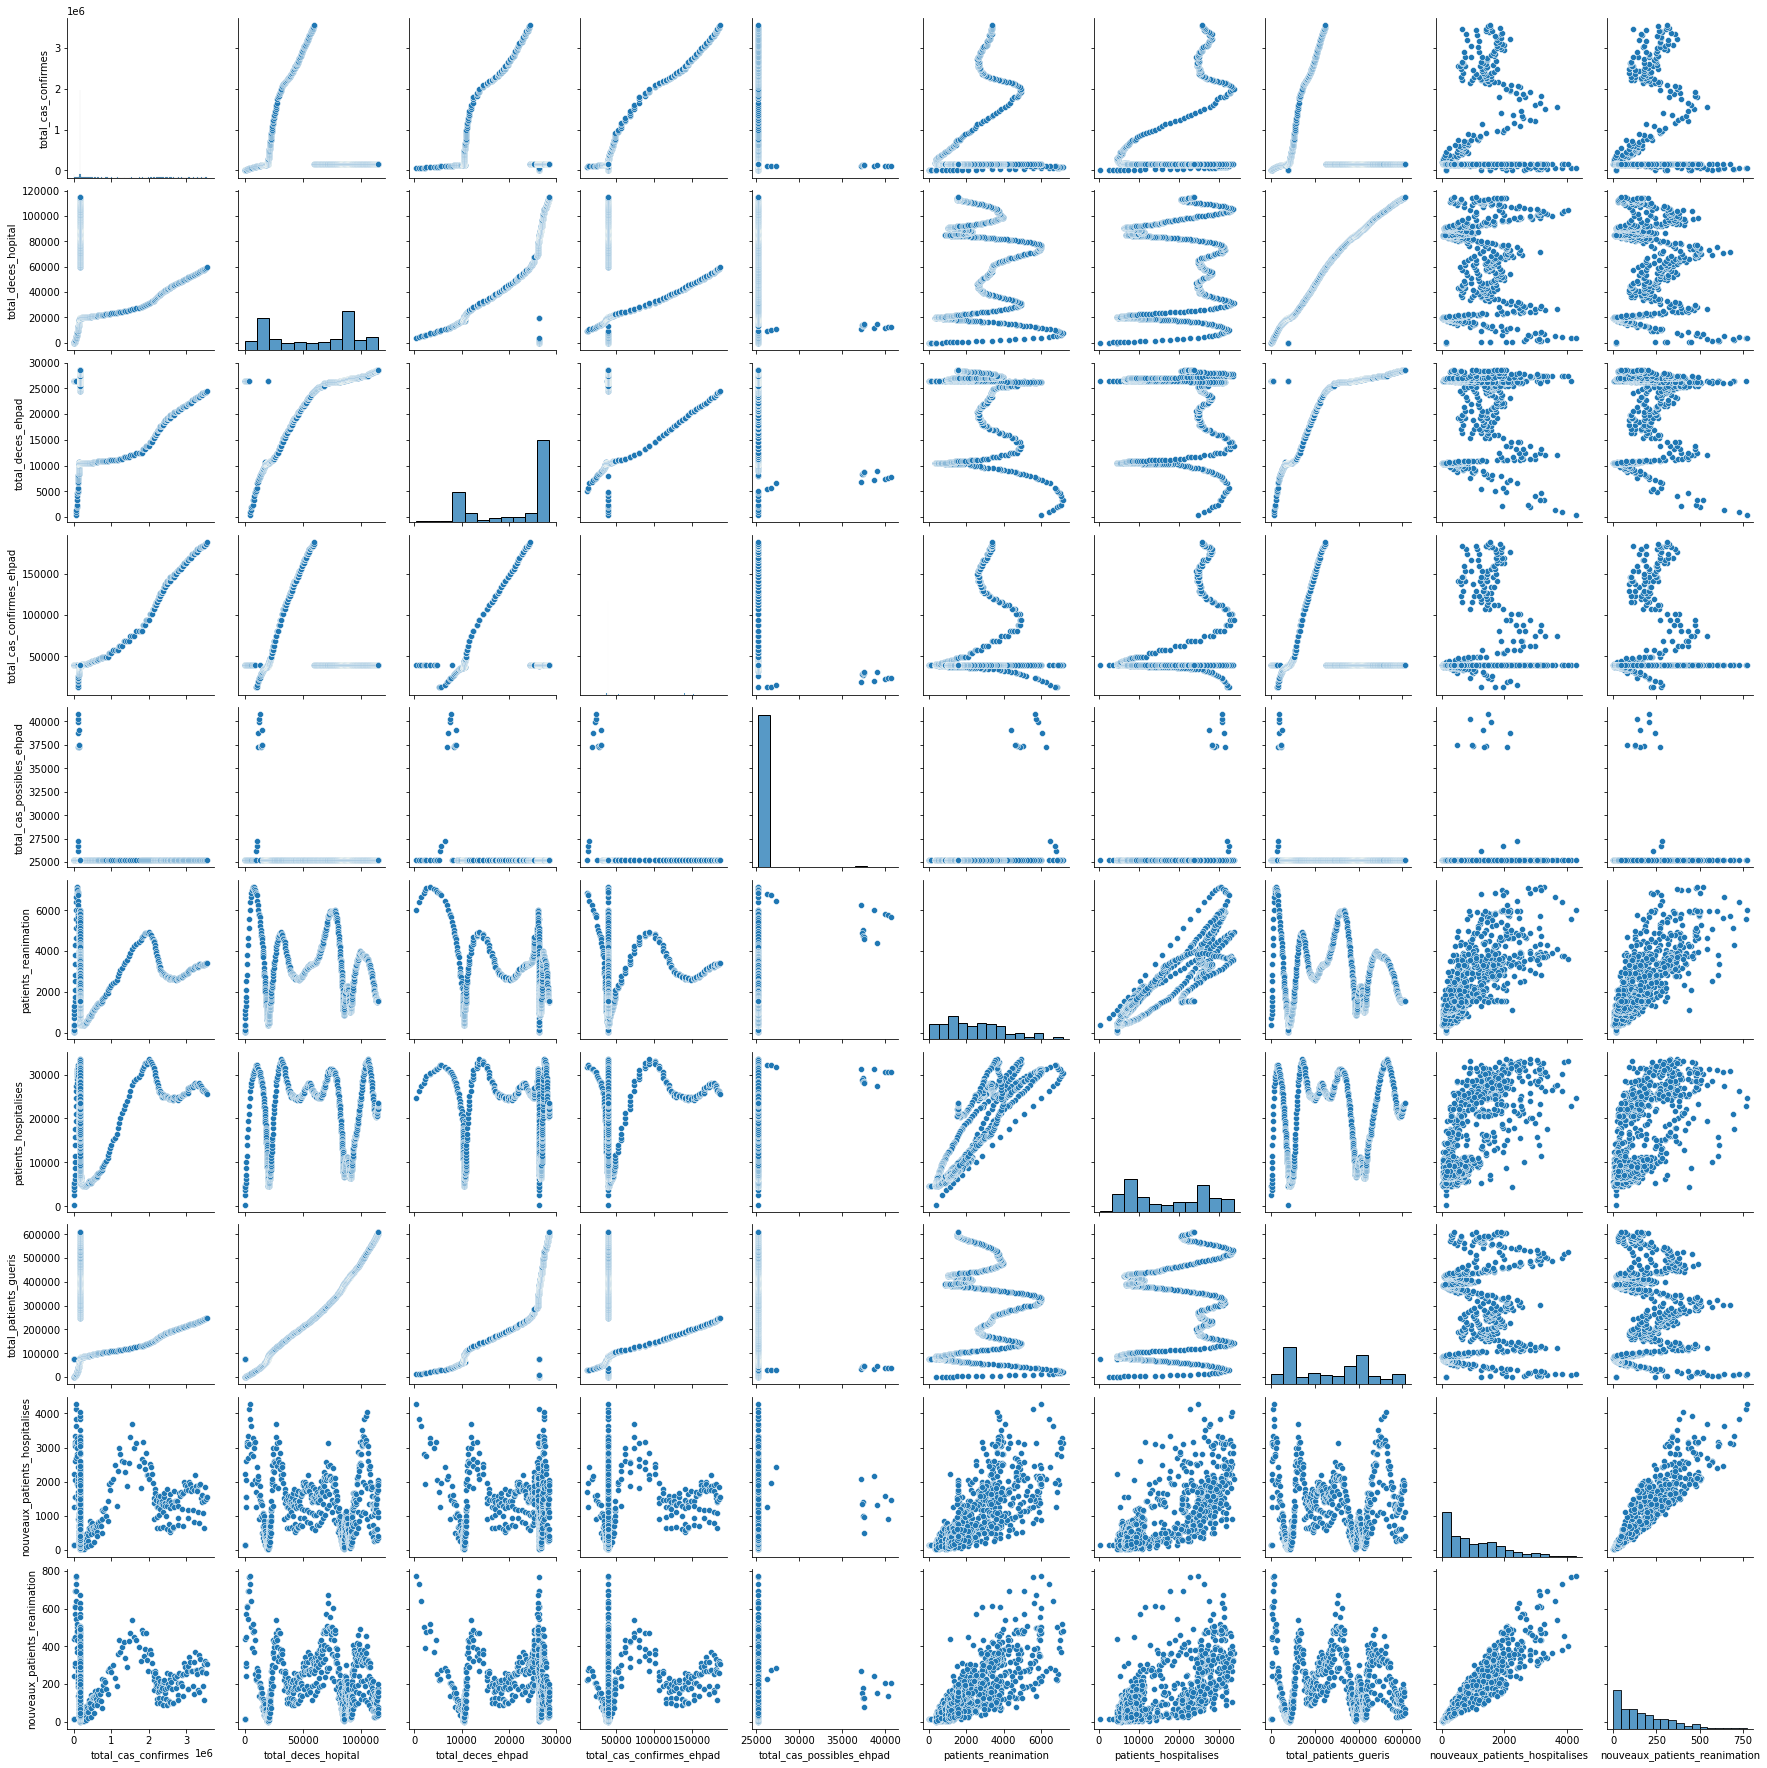

In [63]:
import seaborn as sns
sns.pairplot(df)

In [64]:
df.corr()

,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation
total_cas_confirmes,1.000000,-0.196347,-0.128258,0.986140,-0.059813,0.170259,0.382802,-0.217476,0.233509,0.177687
total_deces_hopital,-0.196347,1.000000,0.839780,-0.143763,-0.163832,0.081254,0.134574,0.991319,0.077170,0.058156
total_deces_ehpad,-0.128258,0.839780,1.000000,-0.042495,-0.211527,0.063567,0.076707,0.837739,0.080551,0.143444
total_cas_confirmes_ehpad,0.986140,-0.143763,-0.042495,1.000000,-0.094427,0.146310,0.365855,-0.166253,0.206889,0.163560
total_cas_possibles_ehpad,-0.059813,-0.163832,-0.211527,-0.094427,1.000000,0.217273,0.163823,-0.166925,0.047617,0.002148
patients_reanimation,0.170259,0.081254,0.063567,0.146310,0.217273,1.000000,0.864280,0.036209,0.719827,0.769719
patients_hospitalises,0.382802,0.134574,0.076707,0.365855,0.163823,0.864280,1.000000,0.115185,0.716164,0.630939
total_patients_gueris,-0.217476,0.991319,0.837739,-0.166253,-0.166925,0.036209,0.115185,1.000000,0.080567,0.031599
nouveaux_patients_hospitalises,0.233509,0.077170,0.080551,0.206889,0.047617,0.719827,0.716164,0.080567,1.000000,0.907245
nouveaux_patients_reanimation,0.177687,0.058156,0.143444,0.163560,0.002148,0.769719,0.630939,0.031599,0.907245,1.000000


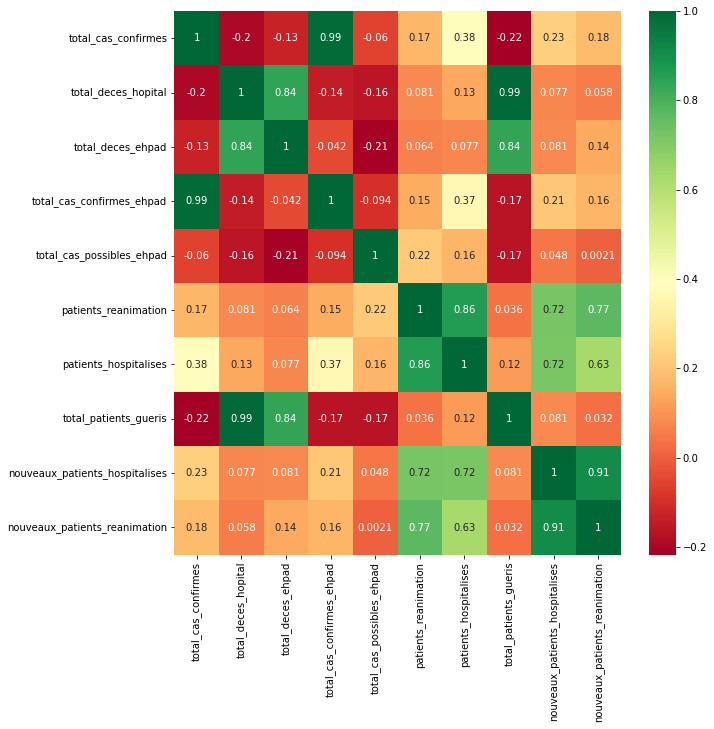

In [65]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [66]:
### Let divide the data into dependent and independent features
X=df.iloc[:,:-1]##independent features
y=df.iloc[:,-1]## dependent features

In [67]:
X.head()

,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises
date,,,,,,,,,
2020-03-02,191.0,3,26473.0,39256.0,25230.0,380.0,4535.0,75649.0,136.0
2020-03-03,212.0,4,26473.0,39256.0,25230.0,380.0,4535.0,12.0,136.0
2020-03-04,285.0,4,26473.0,39256.0,25230.0,15.0,4535.0,75649.0,136.0
2020-03-05,423.0,7,26473.0,39256.0,25230.0,23.0,4535.0,75649.0,136.0
2020-03-06,613.0,9,26473.0,39256.0,25230.0,39.0,4535.0,75649.0,136.0


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [69]:
###Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
mse=cross_val_score(lin_reg,X_train, y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-1546.3356611498943


In [70]:
### Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor=GridSearchCV(ridge, params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit( X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [71]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-1546.3354560893306


In [72]:
### Lasso Regression
from sklearn.linear_model import  Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

lasso_regressor=GridSearchCV(lasso, params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304476.81378000847, tolerance: 927.519909708738
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306712.8922380854, tolerance: 927.148260194175
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288387.44437062636, tolerance: 911.0960922330095
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: O

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [73]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-1545.9114523733524


In [74]:
y_pred=ridge_regressor.predict(X_test)
from sklearn.metrics import r2_score

r2_score1=r2_score(y_pred,y_test)

In [75]:
print(r2_score1)

0.9269533732357462


In [92]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [93]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [94]:
 accuracy_score(y_test,y_pred)

0.027450980392156862

In [95]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         1
        15.0       0.07      1.00      0.12         5
        16.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         3
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         3
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         2
        25.0       0.00    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

##### Conclusion we noticed that after implementing LinearRegression, LassoRegression and Ridge Regression model
##### We obtain the same prediction value
##### R-square = 0.93 shown that is a goodness-of-fit measure for linear, Lasso, Ridge regression models. This statistic 
##### indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.
##### R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.